In [1]:
# installing the Kaggle library
!pip install kaggle

In [6]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
# Kaggle API
! kaggle competitions download -c dogs-vs-cats


 99% 808M/812M [00:09<00:00, 69.7MB/s]
100% 812M/812M [00:09<00:00, 89.8MB/s]


In [8]:
! ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [9]:
#extracting the compressed file
from zipfile import ZipFile
dataset = "/content/dogs-vs-cats.zip"
with ZipFile(dataset,"r") as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [10]:
#extracting the compressed file
from zipfile import ZipFile
dataset = "/content/train.zip"
with ZipFile(dataset,"r") as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [11]:
import os
# counting the number of filesin train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


Printing the name of images

In [12]:
file_names = os.listdir('/content/train/')
print(file_names)

['cat.7033.jpg', 'dog.7542.jpg', 'dog.5331.jpg', 'cat.9750.jpg', 'cat.2347.jpg', 'cat.5780.jpg', 'dog.5267.jpg', 'cat.10778.jpg', 'cat.2250.jpg', 'dog.10545.jpg', 'dog.4604.jpg', 'dog.3227.jpg', 'cat.4981.jpg', 'cat.10564.jpg', 'cat.7236.jpg', 'cat.5088.jpg', 'dog.11506.jpg', 'cat.1629.jpg', 'cat.12382.jpg', 'cat.8020.jpg', 'dog.3271.jpg', 'cat.8836.jpg', 'cat.11375.jpg', 'dog.7822.jpg', 'cat.6450.jpg', 'cat.1266.jpg', 'dog.3046.jpg', 'cat.11515.jpg', 'cat.6983.jpg', 'cat.1878.jpg', 'dog.5839.jpg', 'cat.1468.jpg', 'dog.10198.jpg', 'dog.2339.jpg', 'dog.12287.jpg', 'cat.4357.jpg', 'cat.1039.jpg', 'dog.9742.jpg', 'cat.2840.jpg', 'cat.10152.jpg', 'cat.10391.jpg', 'dog.9326.jpg', 'cat.2890.jpg', 'dog.5120.jpg', 'dog.12306.jpg', 'cat.618.jpg', 'dog.6592.jpg', 'cat.354.jpg', 'dog.4667.jpg', 'cat.8652.jpg', 'dog.10265.jpg', 'dog.2964.jpg', 'cat.4807.jpg', 'cat.1293.jpg', 'cat.4390.jpg', 'cat.1979.jpg', 'cat.2767.jpg', 'cat.10815.jpg', 'cat.11999.jpg', 'dog.185.jpg', 'dog.8197.jpg', 'cat.5812.j

Importing the libraries

In [13]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

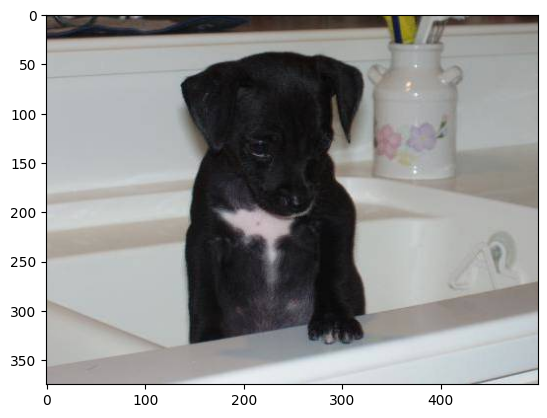

In [14]:
img = mpimg.imread('/content/train/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

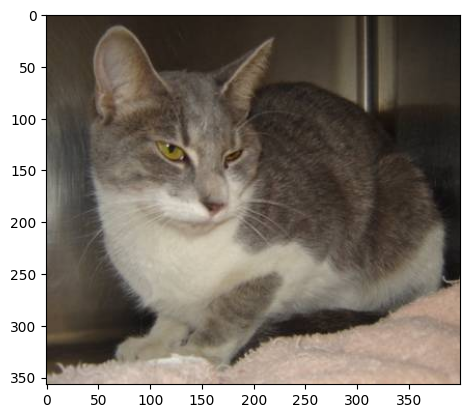

In [15]:
img = mpimg.imread('/content/train/cat.4352.jpg')
imgplt = plt.imshow(img)
plt.show()

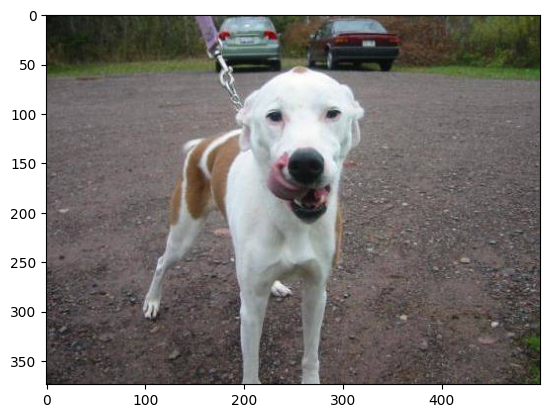

In [16]:
img = mpimg.imread('/content/train/dog.8965.jpg')
imgplt = plt.imshow(img)
plt.show()

Resisizing all the images

In [17]:
file_names = os.listdir('/content/train/')
for i in range(5):
  name= file_names[i]
  print(name[0:3])

cat
dog
dog
cat
cat


In [18]:
file_names = os.listdir('/content/train/')
dog_count=0
cat_count=0
for img_file in file_names:
  name=img_file[0:3]
  if name=="dog":
    dog_count+=1
  else:
    cat_count+=1
print("Number of dog images :",dog_count)
print("Number of cat images :",cat_count)

Number of dog images : 12500
Number of cat images : 12500


In [19]:
#creating a directory for resized images
os.mkdir('/content/image resized')


In [20]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

original_folder = '/content/train/'
resized_folder = '/content/image resized/'

# Ensure the resized folder exists
if not os.path.exists(resized_folder):
    os.makedirs(resized_folder)

for i in range(2000):
    filename = os.listdir(original_folder)[i]
    img_path = os.path.join(original_folder, filename)

    try:
        img = Image.open(img_path)
        img = img.resize((224, 224))
        img = img.convert('RGB')

        new_img_path = os.path.join(resized_folder, filename)
        img.save(new_img_path)
    except Exception as e:
        print(f"Error processing {filename}: {e}")

# Verify if 'dog.8298.jpg' exists in the resized folder
resized_img_path = os.path.join(resized_folder, 'dog.8298.jpg')
if os.path.exists(resized_img_path):
    img = mpimg.imread(resized_img_path)
    imgplt = plt.imshow(img)
    plt.show()
else:
    print(f"File {resized_img_path} not found")


File /content/image resized/dog.8298.jpg not found


In [21]:
file_names = os.listdir('/content/image resized/')
dog_count=0
cat_count=0
for img_file in file_names:
  name=img_file[0:3]
  if name=="dog":
    dog_count+=1
  else:
    cat_count+=1
print("Number of dog images :",dog_count)
print("Number of cat images :",cat_count)

Number of dog images : 1011
Number of cat images : 989


In [22]:
file_names = os.listdir("/content/image resized/")
print(file_names)

['cat.7033.jpg', 'dog.7542.jpg', 'dog.5331.jpg', 'cat.9750.jpg', 'cat.2347.jpg', 'cat.5780.jpg', 'dog.5267.jpg', 'cat.10778.jpg', 'cat.2250.jpg', 'dog.10545.jpg', 'dog.4604.jpg', 'dog.3227.jpg', 'cat.4981.jpg', 'cat.10564.jpg', 'cat.7236.jpg', 'cat.5088.jpg', 'dog.11506.jpg', 'cat.1629.jpg', 'cat.12382.jpg', 'cat.8020.jpg', 'dog.3271.jpg', 'cat.8836.jpg', 'cat.11375.jpg', 'dog.7822.jpg', 'cat.6450.jpg', 'cat.1266.jpg', 'dog.3046.jpg', 'cat.11515.jpg', 'cat.6983.jpg', 'cat.1878.jpg', 'dog.5839.jpg', 'cat.1468.jpg', 'dog.10198.jpg', 'dog.2339.jpg', 'dog.12287.jpg', 'cat.4357.jpg', 'cat.1039.jpg', 'dog.9742.jpg', 'cat.2840.jpg', 'cat.10152.jpg', 'cat.10391.jpg', 'dog.9326.jpg', 'cat.2890.jpg', 'dog.5120.jpg', 'dog.12306.jpg', 'cat.618.jpg', 'dog.6592.jpg', 'cat.354.jpg', 'dog.4667.jpg', 'cat.8652.jpg', 'dog.10265.jpg', 'dog.2964.jpg', 'cat.4807.jpg', 'cat.1293.jpg', 'cat.4390.jpg', 'cat.1979.jpg', 'cat.2767.jpg', 'cat.10815.jpg', 'cat.11999.jpg', 'dog.185.jpg', 'dog.8197.jpg', 'cat.5812.j

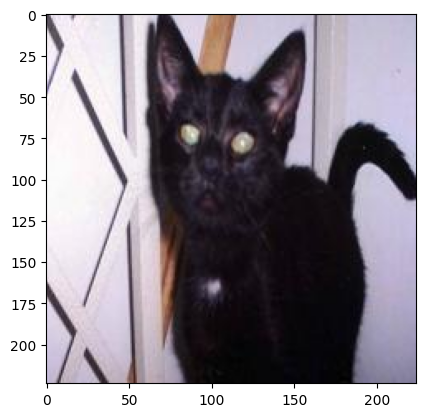

In [23]:
# display resized cat image
img = mpimg.imread('/content/image resized/cat.1979.jpg')
imgplt = plt.imshow(img)
plt.show()

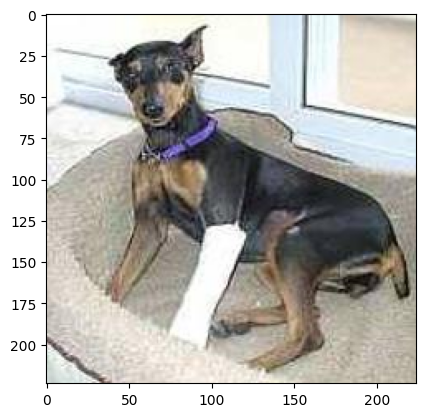

In [25]:
# display resized cat image
img = mpimg.imread('/content/image resized/dog.5331.jpg')
imgplt = plt.imshow(img)
plt.show()

**Creating labels for images**

In [26]:
filenames = os.listdir('/content/image resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [27]:
print(labels)

[0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 

In [28]:
print(filenames[0:5])
print(len(labels))

['cat.7033.jpg', 'dog.7542.jpg', 'dog.5331.jpg', 'cat.9750.jpg', 'cat.2347.jpg']
2000


In [29]:
print(labels[0:5])
print(len(labels))

[0, 1, 1, 0, 0]
2000


In [32]:
#counting the images of dogs and cat
values,counts= np.unique(labels,return_counts=True)
print(values)
print(counts)

[0 1]
[ 989 1011]


Converting all the resized images to numpy array

In [33]:
import cv2
import glob

In [35]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [36]:
print(dog_cat_images)

[[[[168 154 132]
   [164 150 128]
   [165 151 129]
   ...
   [114 105 138]
   [103  93 129]
   [ 96  85 123]]

  [[170 156 134]
   [170 156 134]
   [170 156 134]
   ...
   [116 108 139]
   [113 104 137]
   [110 100 136]]

  [[169 155 133]
   [175 161 139]
   [178 164 142]
   ...
   [120 112 142]
   [118 110 141]
   [117 109 140]]

  ...

  [[ 87  84  79]
   [ 88  85  80]
   [ 89  86  81]
   ...
   [220 212 243]
   [222 214 245]
   [224 216 247]]

  [[ 86  82  77]
   [ 87  83  78]
   [ 88  85  77]
   ...
   [223 215 245]
   [221 213 243]
   [219 211 241]]

  [[ 83  79  74]
   [ 84  80  75]
   [ 86  83  75]
   ...
   [226 218 248]
   [221 213 243]
   [215 207 237]]]


 [[[ 42  68  85]
   [ 42  68  85]
   [ 40  66  83]
   ...
   [ 18  16  16]
   [ 24  22  12]
   [ 17  14   0]]

  [[ 43  69  85]
   [ 39  65  81]
   [ 34  60  76]
   ...
   [ 14  11  13]
   [ 21  18  10]
   [ 22  18   7]]

  [[ 40  68  79]
   [ 43  71  82]
   [ 43  71  82]
   ...
   [ 12   8  14]
   [ 14  10   9]
   [ 22  18

In [37]:
type(dog_cat_images)

numpy.ndarray

In [38]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [39]:
X=dog_cat_images
Y=np.asarray(labels)

Train Test Split

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [42]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [43]:
#scaling the data
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [44]:
print(X_train_scaled)

[[[[0.32156863 0.35686275 0.39607843]
   [0.2627451  0.29803922 0.3372549 ]
   [0.2745098  0.30980392 0.34901961]
   ...
   [0.48627451 0.34117647 0.2627451 ]
   [0.50196078 0.36078431 0.29803922]
   [0.51764706 0.38431373 0.32156863]]

  [[0.37647059 0.4        0.44313725]
   [0.31764706 0.35294118 0.39215686]
   [0.3254902  0.34901961 0.39215686]
   ...
   [0.46666667 0.30980392 0.23921569]
   [0.48235294 0.32941176 0.27058824]
   [0.49803922 0.35686275 0.29411765]]

  [[0.34901961 0.36862745 0.40392157]
   [0.31764706 0.34509804 0.38039216]
   [0.34117647 0.36078431 0.39607843]
   ...
   [0.47058824 0.29411765 0.23921569]
   [0.48627451 0.31372549 0.2627451 ]
   [0.49803922 0.33333333 0.28235294]]

  ...

  [[0.74117647 0.69411765 0.68627451]
   [0.74117647 0.69411765 0.68627451]
   [0.7372549  0.69019608 0.68235294]
   ...
   [0.68235294 0.63921569 0.62352941]
   [0.69411765 0.65098039 0.63529412]
   [0.69803922 0.65490196 0.63921569]]

  [[0.73333333 0.68627451 0.67843137]
   [0.7

In [45]:
print(X_test_scaled)

[[[[0.31372549 0.38823529 0.44705882]
   [0.31372549 0.38823529 0.44705882]
   [0.32156863 0.39607843 0.45490196]
   ...
   [0.31372549 0.41176471 0.4745098 ]
   [0.3254902  0.42352941 0.48627451]
   [0.32941176 0.42745098 0.49019608]]

  [[0.3254902  0.4        0.45882353]
   [0.3254902  0.4        0.45882353]
   [0.32941176 0.40392157 0.4627451 ]
   ...
   [0.30196078 0.4        0.4627451 ]
   [0.29803922 0.39607843 0.45882353]
   [0.29803922 0.39607843 0.45882353]]

  [[0.34117647 0.41568627 0.4745098 ]
   [0.34117647 0.41568627 0.4745098 ]
   [0.3372549  0.41176471 0.47058824]
   ...
   [0.29411765 0.39215686 0.45490196]
   [0.28235294 0.38039216 0.44313725]
   [0.27843137 0.37647059 0.43921569]]

  ...

  [[0.58039216 0.64313725 0.69411765]
   [0.58823529 0.65098039 0.70196078]
   [0.58823529 0.65098039 0.70196078]
   ...
   [0.58039216 0.65490196 0.70588235]
   [0.60784314 0.68235294 0.73333333]
   [0.58039216 0.65490196 0.70588235]]

  [[0.57254902 0.63529412 0.68627451]
   [0.5

Building the nurel network

In [46]:
import tensorflow as tf
import tensorflow_hub as hub

In [47]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [48]:
num_of_classes=2
model=tf.keras.Sequential(
    [
        pretrained_model,
        tf.keras.layers.Dense(num_of_classes)
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [49]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [50]:
model.fit(X_train_scaled,Y_train,epochs=5)

Epoch 1/5
50/50 [==============================] - 61s 1s/step - loss: 0.2061 - acc: 0.9187
Epoch 2/5
50/50 [==============================] - 56s 1s/step - loss: 0.0682 - acc: 0.9762
Epoch 3/5
50/50 [==============================] - 57s 1s/step - loss: 0.0511 - acc: 0.9819
Epoch 4/5
50/50 [==============================] - 57s 1s/step - loss: 0.0394 - acc: 0.9881
Epoch 5/5
50/50 [==============================] - 56s 1s/step - loss: 0.0323 - acc: 0.9925


In [51]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 14s 955ms/step - loss: 0.0491 - acc: 0.9800
Test Loss = 0.04913758859038353
Test Accuracy = 0.9800000190734863


Predictive System

Path of the image to be predicted: /content/dog.jpg


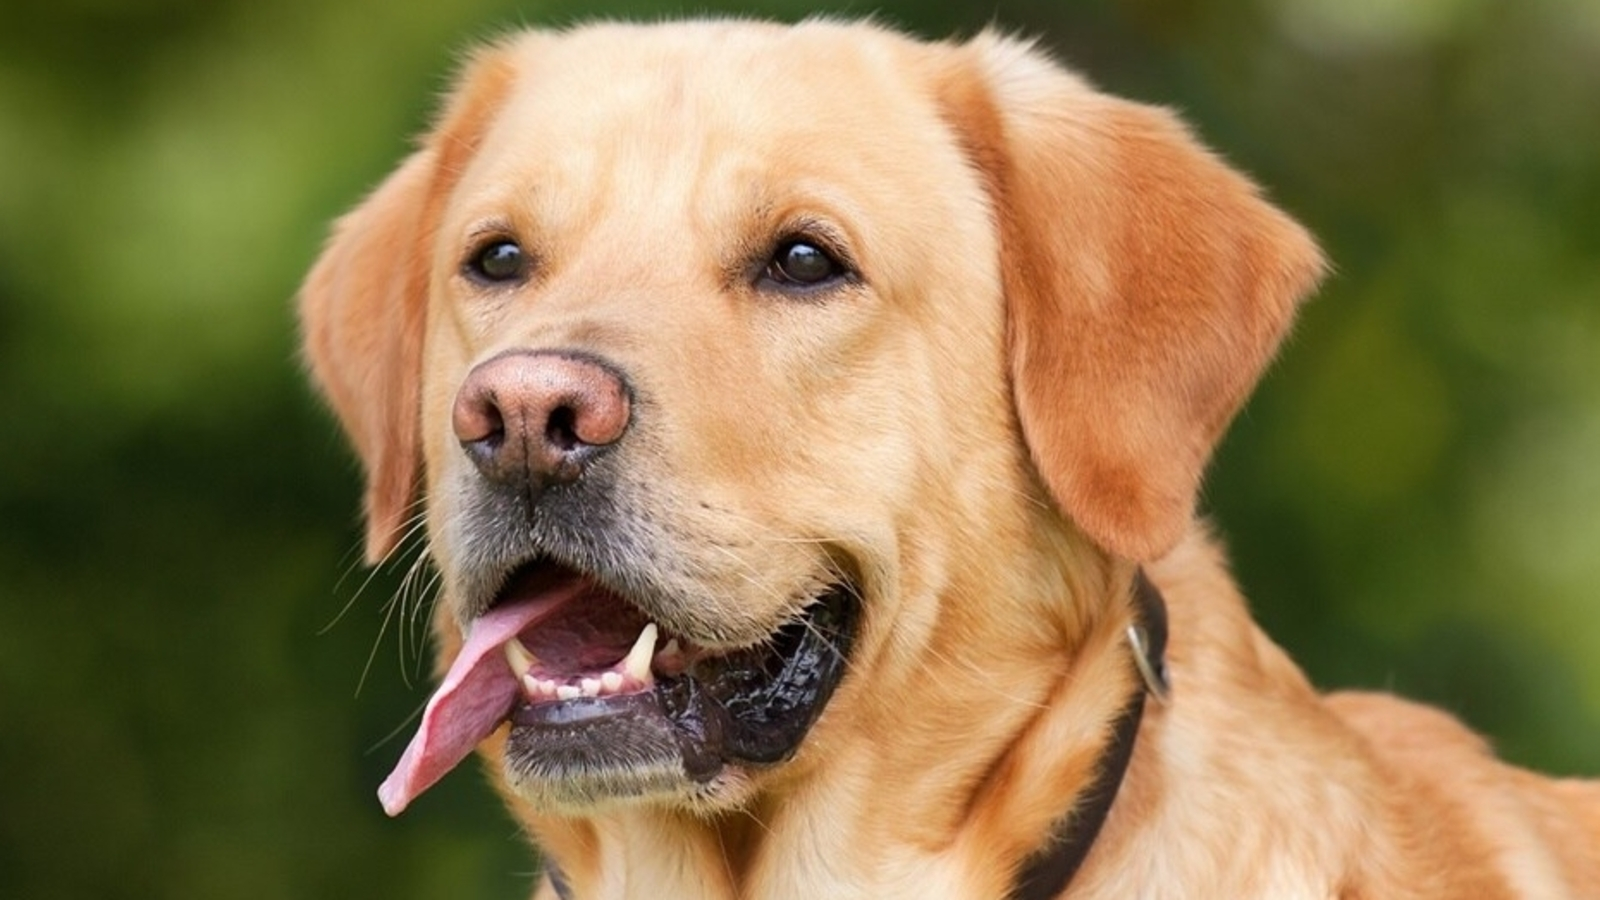

1/1 [==============================] - 1s 951ms/step
[[-6.1123285  5.477399 ]]
1
The image represents a Dog


In [53]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')